In [1]:
%pylab inline
import random

import numpy as np
import random
import pickle
from tqdm import tqdm
import letor_metrics

Populating the interactive namespace from numpy and matplotlib


In [2]:
# raw_data = np.loadtxt('./data/ml-1m/ratings.dat', delimiter='::')

In [3]:
# from dataset import TripletsDataset

In [4]:
# ds = TripletsDataset(raw_data, threshold_user=60, rnd_seed=42)
# ds.train_test_split(n_train=50)

In [5]:
# pickle.dump(ds, open('./tmp/ds.pkl', 'wb'))
ds = pickle.load(open('./tmp/ds.pkl', 'rb'))

In [6]:
ds.init_cached_random()

# define model

In [7]:
import tensorflow as tf
import bprnn

In [8]:
import imp

In [14]:
imp.reload(bprnn)

<module 'bprnn' from '/Users/mikhail/std/repos/nnmf/bprnn.py'>

In [15]:
model.destroy()

AttributeError: 'BPR_NN' object has no attribute 'session'

In [16]:
N_USERS = 6041 #int(max(raw_data[:, 0])) + 1
N_ITEMS = 3953 #int(max(raw_data[:, 1])) + 1
N_EMBEDDINGS = 5

In [17]:
import tensorflow.contrib.slim as slim

def inner_network(user_emb, item_emb):
    joined_input = tf.concat(1, [user_emb, item_emb])
    net = slim.fully_connected(inputs=joined_input, num_outputs=128, activation_fn=tf.nn.relu)
#     net = slim.dro
    net = slim.fully_connected(inputs=net, num_outputs=1, activation_fn=None)
    return net

In [18]:
model = bprnn.BPR_NN(N_USERS, N_ITEMS, N_EMBEDDINGS, alpha=0.1, beta=0.9, alpha_reg=0.0, inner_net=inner_network)
model.build_graph()
model.initialize_session()

In [19]:
losses = []
batch_size = 1024
for n_batches, cur_optim in [(5000, model.trainer_2)]:
    for i in tqdm(range(n_batches)):
        batch = ds.sample_train_batch(n_samples=batch_size)
        fd = {
            model.user_ids:  batch['users'], 
            model.left_ids:  batch['left_items'],
            model.right_ids: batch['right_items'],
            model.target_y:  batch['y'],
        }
        el, nl, reg, t, _ = model.session.run(
            [model.embedding_loss, model.net_loss, model.regularization, model.target, cur_optim], 
            feed_dict=fd
        )
        losses.append((el, nl, reg, t))
        if i%500==0:
            user_norm = np.linalg.norm(model.weights_u)
            item_norm = np.linalg.norm(model.weights_i)
            print('[it {}] weight norms, users: {}, items: {}'.format(i, user_norm, item_norm))
            print('[it {}] metrics (emb_loss, net_loss, reg, target): {}'.format(i, losses[-1]))

  0%|          | 10/5000 [00:00<07:02, 11.81it/s]

[it 0] weight norms, users: 81.87957763671875, items: 100.38319396972656
[it 0] metrics (emb_loss, net_loss, reg, target): (0.73768735, 0.69131172, 5.0836182, 0.69594926)


 10%|█         | 520/5000 [00:05<00:47, 93.82it/s]

[it 500] weight norms, users: 88.98603820800781, items: 120.2442626953125
[it 500] metrics (emb_loss, net_loss, reg, target): (0.4914186, 0.41866499, 7.5365191, 0.42594033)


 20%|██        | 1019/5000 [00:11<00:44, 90.01it/s]

[it 1000] weight norms, users: 95.35859680175781, items: 129.7133331298828
[it 1000] metrics (emb_loss, net_loss, reg, target): (0.44071901, 0.35596791, 9.1187305, 0.36444303)


 30%|███       | 1511/5000 [00:16<00:38, 91.71it/s]

[it 1500] weight norms, users: 100.92807006835938, items: 136.63095092773438
[it 1500] metrics (emb_loss, net_loss, reg, target): (0.42627802, 0.36274546, 10.323477, 0.36909872)


 40%|████      | 2013/5000 [00:22<00:33, 89.93it/s]

[it 2000] weight norms, users: 105.85566711425781, items: 142.45872497558594
[it 2000] metrics (emb_loss, net_loss, reg, target): (0.39825571, 0.31761485, 11.351219, 0.32567891)


 50%|█████     | 2511/5000 [00:27<00:27, 91.63it/s]

[it 2500] weight norms, users: 110.19851684570312, items: 147.58592224121094
[it 2500] metrics (emb_loss, net_loss, reg, target): (0.40304917, 0.32626155, 12.195501, 0.33394033)


 60%|██████    | 3017/5000 [00:33<00:21, 91.47it/s]

[it 3000] weight norms, users: 114.39310455322266, items: 152.18980407714844
[it 3000] metrics (emb_loss, net_loss, reg, target): (0.39941064, 0.31732523, 12.936162, 0.32553378)


 70%|███████   | 3515/5000 [00:39<00:17, 84.83it/s]

[it 3500] weight norms, users: 118.22757720947266, items: 156.3628387451172
[it 3500] metrics (emb_loss, net_loss, reg, target): (0.40307432, 0.31838524, 13.492691, 0.32685414)


 80%|████████  | 4015/5000 [00:45<00:11, 84.45it/s]

[it 4000] weight norms, users: 121.72247314453125, items: 160.21783447265625
[it 4000] metrics (emb_loss, net_loss, reg, target): (0.4145489, 0.32979274, 14.433292, 0.33826834)


 90%|█████████ | 4513/5000 [00:50<00:05, 92.89it/s]

[it 4500] weight norms, users: 124.91194152832031, items: 163.6687774658203
[it 4500] metrics (emb_loss, net_loss, reg, target): (0.38558906, 0.29682976, 15.175762, 0.30570567)


100%|██████████| 5000/5000 [00:56<00:00, 89.24it/s]


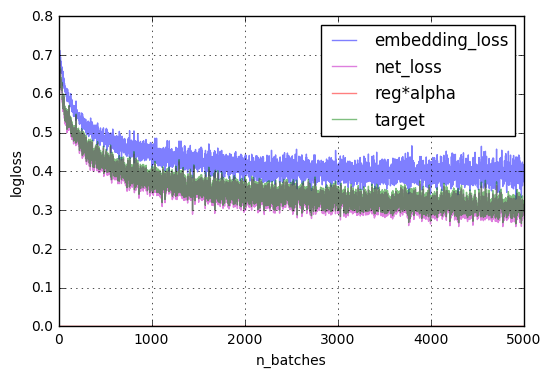

In [20]:
plot([x[0] for x in losses], c='b', label='embedding_loss', alpha=0.5)
plot([x[1] for x in losses], c='m', label='net_loss', alpha=0.5)
plot([x[2]*model.alpha_reg for x in losses], c='r', label='reg*alpha', alpha=0.5)
plot([x[3] for x in losses], c='g', label='target', alpha=0.5)
grid()
legend()
xlabel('n_batches')
ylabel('logloss')

In [28]:
ndcg_vals = []
for u in tqdm(ds.data_keys, desc='Prediction', leave=True):
    response = np.zeros(len(ds.test[u]))
    fd = {
            model.user_ids:  (np.ones(len(ds.test[u]))*u).astype(np.int32), 
            model.left_ids:  np.array([i for (i, r) in ds.test[u]]).astype(np.int32),
        }
    response += model.session.run(model.embedding_left, feed_dict=fd)[:, 0]
    response += model.session.run(model.left_output, feed_dict=fd)[:, 0]

    # make relevances
    relevances = np.array([r for (i, r) in ds.test[u]])
    predicted_ranking = np.argsort(-response)
    # calc score
    gain = letor_metrics.ndcg_from_ranking(relevances, predicted_ranking, 10)
    ndcg_vals.append(gain)

Prediction: 100%|██████████| 3938/3938 [00:04<00:00, 939.61it/s]


In [29]:
np.mean(ndcg_vals)

0.71360432689178477